In [39]:
import numpy as np

from scipy import optimize

In [92]:
xs = np.linspace(0, 5, num = 15)

n = 15

w = 0.75
w0 = 0.33


noise = np.random.normal(size = n) * 0.15
noise[5] += 2.0

ys = w*xs + w0 + noise

y_real = w*xs + w0

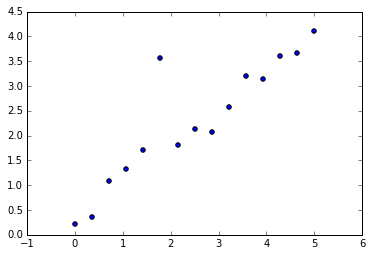

In [93]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(xs, ys)

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
model = LinearRegression()

model.fit(xs.reshape(-1,1), ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
ys_pr = model.predict(xs.reshape(-1,1))

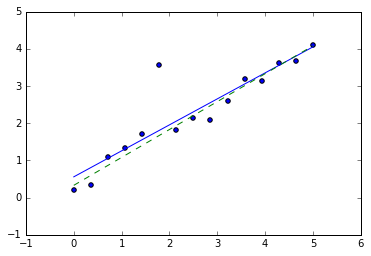

In [97]:
plt.plot(xs, ys_pr)
plt.scatter(xs, ys)

plt.plot(xs,y_real, '--')

In [98]:
def loss_n_power(ws, xs, ys, n=2):
    w, w0 = ws
    
    losses = np.mean(np.abs((xs*w + w0 - ys))**n)
    
    return losses

In [99]:
opt2 = optimize.minimize(loss_n_power, x0 = [0.0, 0.0], method = "Powell", args = (xs, ys, 2), tol = 1.0e-9)

In [100]:
opt3 = optimize.minimize(loss_n_power, x0 = [0.0, 0.0], method = "Powell", args = (xs, ys, 3), tol = 1.0e-9)

In [101]:
opt4 = optimize.minimize(loss_n_power, x0 = [0.0, 0.0], method = "Powell", args = (xs, ys, 4), tol = 1.0e-9)

In [102]:
opt1 = optimize.minimize(loss_n_power, x0 = [0.0, 0.0], method = "Powell", args = (xs, ys, 1), tol = 1.0e-9)

In [103]:
opt.x

array([ 0.35867279,  1.09354339])

In [104]:
w2, w20 = opt2.x
w3, w30 = opt3.x
w4, w40 = opt4.x

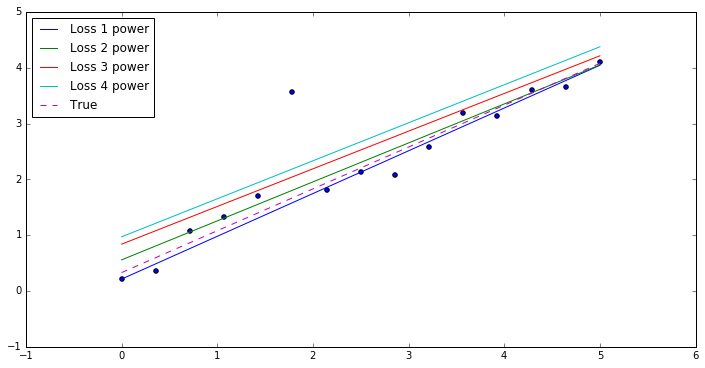

In [105]:
plt.figure(figsize=(12,6))

for i, opt in enumerate([opt1, opt2, opt3, opt4]):
    w_p, w0_p = opt.x
    plt.plot([0,5], [w0_p, w0_p + 5*w_p], label = 'Loss %d power' %(i+1))
    
plt.scatter(xs,ys)
plt.plot(xs, y_real, '--', label = 'True')
plt.legend(loc = 'upper left')